In [ ]:
!pip install pandas

In [294]:
import pandas as pd
from datetime import datetime

In [295]:
url = ('https://docs.google.com/spreadsheets'
       '/d/1UF2pSkFTURko2OvfHWWlFpDFAr1UxCBA4JLwlSP6KFo/export?format=csv&id')

def combine_region(row):
    province = row["Province/State"]
    country = row["Country/Region"]
    
    if province == country:
        return province
    
    if province != '':
        return province + ', ' + country
    
    return country


def clean_df(df):
    # Tranpose so that the provinces/cities are in the column headers
    df = df.T
    
    # Replace NaN with "" (to combine the Province/State and Country/Region later)
    df.fillna("", inplace=True)
    
    # Combine Province/State and Country/Region data and make them the columns
    df.columns = df.loc[['Province/State', 'Country/Region']].apply(combine_region)
    
    # Drop the Province/State, Country/Region rows now that the columns are created
    df.drop(
        ['Province/State','Country/Region','Lat','Long']\
        ,axis=0, inplace=True)
    return df

def to_datetime(df):    
    # Change index to datetime type
    df.index = pd.to_datetime(df.index)
    
    # Fill empty spaces with 0 value
    df = df.replace('', 0).astype(int)
    return df

confirmed = pd.read_csv(url)
confirmed = clean_df(confirmed)
confirmed.head()

,"Anhui, Mainland China","Beijing, Mainland China","Chongqing, Mainland China","Fujian, Mainland China","Gansu, Mainland China","Guangdong, Mainland China","Guangxi, Mainland China","Guizhou, Mainland China","Hainan, Mainland China","Hebei, Mainland China",...,Russia,Sweden,"Santa Clara, CA, US",Spain,"South Australia, Australia","Boston, MA, US","San Benito, CA, US",Belgium,"Madison, WI, US","Cruise Ship, Others"
First confirmed date in country (Est.),1/3/2020,1/3/2020,1/3/2020,1/3/2020,1/3/2020,1/3/2020,1/3/2020,1/3/2020,1/3/2020,1/3/2020,...,1/31/2020,1/31/2020,1/31/2020,2/1/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/7/2020
1/21/2020 10:00 PM,,10,5,,,17,,,,,...,,,,,,,,,,
1/22/2020 12:00 PM,1,14,6,1,,26,2,1,4,1,...,,,,,,,,,,
1/23/2020 12:00 PM,9,22,9,5,2,32,5,3,5,1,...,,,,,,,,,,
1/24/2020 12:00 AM,15,26,27,5,2,53,13,3,8,2,...,,,,,,,,,,


In [296]:
confirmed.drop(['First confirmed date in country (Est.)'], axis=0, inplace=True)

In [297]:
confirmed.head()

,"Anhui, Mainland China","Beijing, Mainland China","Chongqing, Mainland China","Fujian, Mainland China","Gansu, Mainland China","Guangdong, Mainland China","Guangxi, Mainland China","Guizhou, Mainland China","Hainan, Mainland China","Hebei, Mainland China",...,Russia,Sweden,"Santa Clara, CA, US",Spain,"South Australia, Australia","Boston, MA, US","San Benito, CA, US",Belgium,"Madison, WI, US","Cruise Ship, Others"
1/21/2020 10:00 PM,,10,5,,,17,,,,,...,,,,,,,,,,
1/22/2020 12:00 PM,1,14,6,1,,26,2,1,4,1,...,,,,,,,,,,
1/23/2020 12:00 PM,9,22,9,5,2,32,5,3,5,1,...,,,,,,,,,,
1/24/2020 12:00 AM,15,26,27,5,2,53,13,3,8,2,...,,,,,,,,,,
1/24/2020 12:00 PM,15,36,27,10,2,53,23,3,8,2,...,,,,,,,,,,


In [298]:
confirmed = to_datetime(confirmed)
confirmed.head()

,"Anhui, Mainland China","Beijing, Mainland China","Chongqing, Mainland China","Fujian, Mainland China","Gansu, Mainland China","Guangdong, Mainland China","Guangxi, Mainland China","Guizhou, Mainland China","Hainan, Mainland China","Hebei, Mainland China",...,Russia,Sweden,"Santa Clara, CA, US",Spain,"South Australia, Australia","Boston, MA, US","San Benito, CA, US",Belgium,"Madison, WI, US","Cruise Ship, Others"
2020-01-21 22:00:00,0,10,5,0,0,17,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-22 12:00:00,1,14,6,1,0,26,2,1,4,1,...,0,0,0,0,0,0,0,0,0,0
2020-01-23 12:00:00,9,22,9,5,2,32,5,3,5,1,...,0,0,0,0,0,0,0,0,0,0
2020-01-24 00:00:00,15,26,27,5,2,53,13,3,8,2,...,0,0,0,0,0,0,0,0,0,0
2020-01-24 12:00:00,15,36,27,10,2,53,23,3,8,2,...,0,0,0,0,0,0,0,0,0,0


### Number of case difference per day

In [299]:
confirmed.diff().head()

,"Anhui, Mainland China","Beijing, Mainland China","Chongqing, Mainland China","Fujian, Mainland China","Gansu, Mainland China","Guangdong, Mainland China","Guangxi, Mainland China","Guizhou, Mainland China","Hainan, Mainland China","Hebei, Mainland China",...,Russia,Sweden,"Santa Clara, CA, US",Spain,"South Australia, Australia","Boston, MA, US","San Benito, CA, US",Belgium,"Madison, WI, US","Cruise Ship, Others"
2020-01-21 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22 12:00:00,1.0,4.0,1.0,1.0,0.0,9.0,2.0,1.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23 12:00:00,8.0,8.0,3.0,4.0,2.0,6.0,3.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24 00:00:00,6.0,4.0,18.0,0.0,0.0,21.0,8.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24 12:00:00,0.0,10.0,0.0,5.0,0.0,0.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Average number of cases per day

In [300]:
number_of_days = (confirmed.index[-1]-confirmed.index[0]).days
number_of_days

17

In [301]:
speed = confirmed.diff().sum().to_frame(name="Cases/day")/number_of_days
speed.iloc[23:29]

,Cases/day
"Shanghai, Mainland China",16.000000
"Shanxi, Mainland China",6.117647
"Sichuan, Mainland China",21.235294
"Tianjin, Mainland China",5.058824
"Tibet, Mainland China",0.058824
"Xinjiang, Mainland China",2.470588


### Top 5 places with the most and fewest average cases per day

In [302]:
speed.nlargest(5, "Cases/day")

,Cases/day
"Hubei, Mainland China",1451.941176
"Guangdong, Mainland China",62.235294
"Zhejiang, Mainland China",61.352941
"Henan, Mainland China",57.705882
"Hunan, Mainland China",47.176471


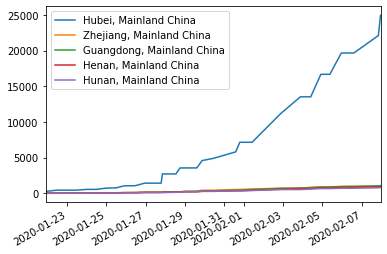

In [303]:
confirmed[['Hubei, Mainland China','Zhejiang, Mainland China','Guangdong, Mainland China',\
       'Henan, Mainland China','Hunan, Mainland China']].plot()

### Since Hubei region is so dominant regarding the number of virus cases, the other 4 areas are shown in a separate plot to see the differences more clearly.

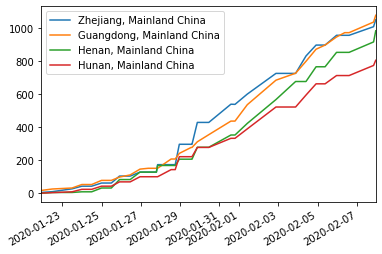

In [304]:
confirmed[['Zhejiang, Mainland China','Guangdong, Mainland China',\
       'Henan, Mainland China','Hunan, Mainland China']].plot()

In [305]:
speed.nsmallest(5, "Cases/day")

,Cases/day
"Seattle, WA, US",0.000000
"Tibet, Mainland China",0.058824
"Tempe, AZ, US",0.058824
Nepal,0.058824
"Orange, CA, US",0.058824


## Recoveries data

In [306]:
recovered_url = ('https://docs.google.com/spreadsheets'
                 '/d/1UF2pSkFTURko2OvfHWWlFpDFAr1UxCBA4JLwlSP6KFo/export?format=csv&gid=1940183135')
recovered = pd.read_csv(recovered_url)

recovered = clean_df(recovered)
recovered.head()

,"Anhui, Mainland China","Beijing, Mainland China","Chongqing, Mainland China","Fujian, Mainland China","Gansu, Mainland China","Guangdong, Mainland China","Guangxi, Mainland China","Guizhou, Mainland China","Hainan, Mainland China","Hebei, Mainland China",...,Russia,Sweden,"Santa Clara, CA, US",Spain,"South Australia, Australia","Boston, MA, US","San Benito, CA, US",Belgium,"Madison, WI, US","Cruise Ship, Others"
First confirmed date in country,1/3/2020,1/3/2020,1/3/2020,1/3/2020,1/3/2020,1/3/2020,1/3/2020,1/3/2020,1/3/2020,1/3/2020,...,1/31/2020,1/31/2020,1/31/2020,2/1/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/7/2020
1/21/2020 10:00 PM,,,,,,,,,,,...,,,,,,,,,,
1/22/2020 12:00 PM,,,,,,,,,,,...,,,,,,,,,,
1/23/2020 12:00 PM,,,,,,2,,,,,...,,,,,,,,,,
1/24/2020 12:00 AM,,,,,,2,,,,,...,,,,,,,,,,


In [307]:
recovered.drop(['First confirmed date in country'], axis=0, inplace=True)

In [308]:
recovered.head()

,"Anhui, Mainland China","Beijing, Mainland China","Chongqing, Mainland China","Fujian, Mainland China","Gansu, Mainland China","Guangdong, Mainland China","Guangxi, Mainland China","Guizhou, Mainland China","Hainan, Mainland China","Hebei, Mainland China",...,Russia,Sweden,"Santa Clara, CA, US",Spain,"South Australia, Australia","Boston, MA, US","San Benito, CA, US",Belgium,"Madison, WI, US","Cruise Ship, Others"
1/21/2020 10:00 PM,,,,,,,,,,,...,,,,,,,,,,
1/22/2020 12:00 PM,,,,,,,,,,,...,,,,,,,,,,
1/23/2020 12:00 PM,,,,,,2,,,,,...,,,,,,,,,,
1/24/2020 12:00 AM,,,,,,2,,,,,...,,,,,,,,,,
1/24/2020 12:00 PM,,1,,,,2,,,,,...,,,,,,,,,,


In [309]:
recovered = to_datetime(recovered)

## Recoveries Rate in general

In [310]:
no_of_recoveries = recovered.iloc[[-1]]
no_of_recoveries

,"Anhui, Mainland China","Beijing, Mainland China","Chongqing, Mainland China","Fujian, Mainland China","Gansu, Mainland China","Guangdong, Mainland China","Guangxi, Mainland China","Guizhou, Mainland China","Hainan, Mainland China","Hebei, Mainland China",...,Russia,Sweden,"Santa Clara, CA, US",Spain,"South Australia, Australia","Boston, MA, US","San Benito, CA, US",Belgium,"Madison, WI, US","Cruise Ship, Others"
2020-02-07 22:50:00,47,34,31,20,9,97,17,6,11,25,...,0,0,0,0,0,0,0,0,0,0


In [311]:
no_of_cfm = confirmed.iloc[[-1]]
no_of_cfm

,"Anhui, Mainland China","Beijing, Mainland China","Chongqing, Mainland China","Fujian, Mainland China","Gansu, Mainland China","Guangdong, Mainland China","Guangxi, Mainland China","Guizhou, Mainland China","Hainan, Mainland China","Hebei, Mainland China",...,Russia,Sweden,"Santa Clara, CA, US",Spain,"South Australia, Australia","Boston, MA, US","San Benito, CA, US",Belgium,"Madison, WI, US","Cruise Ship, Others"
2020-02-07 22:50:00,733,315,426,239,71,1075,183,89,124,195,...,2,1,2,1,2,1,2,1,1,61


In [312]:
recovery_rate = ((no_of_recoveries/no_of_cfm) * 100).T
recovery_rate.head(8)

,2020-02-07 22:50:00
"Anhui, Mainland China",6.412005
"Beijing, Mainland China",10.793651
Belgium,0.000000
"Boston, MA, US",0.000000
"British Columbia, Canada",0.000000
Cambodia,0.000000
"Chicago, IL, US",0.000000
"Chongqing, Mainland China",7.276995


## Positive recoveries rate

In [313]:
positive_rate = recovery_rate[recovery_rate.iloc[:, 0] > 0].sort_values(
    by=recovery_rate.columns[0], ascending=False)
positive_rate.head()

,2020-02-07 22:50:00
Sri Lanka,100.000000
"New South Wales, Australia",50.000000
Thailand,20.000000
"Qinghai, Mainland China",16.666667
"Hunan, Mainland China",14.819427


## Total confirmed cases in each area

In [314]:
no_of_cfm = no_of_cfm.transpose()

In [315]:
no_of_cfm.index.names = ['Place']
no_of_cfm.columns = [str(no_of_cfm.columns[0]) + ' Confirmed']
no_of_cfm.head()

,2020-02-07 22:50:00 Confirmed
Place,
"Anhui, Mainland China",733
"Beijing, Mainland China",315
"Chongqing, Mainland China",426
"Fujian, Mainland China",239
"Gansu, Mainland China",71


## Total recovered cases in each area

In [316]:
no_of_recoveries = no_of_recoveries.transpose()

In [317]:
no_of_recoveries.index.names = ['Place']
no_of_recoveries.columns = [str(no_of_recoveries.columns[0]) + ' Recovered']

In [318]:
no_of_recoveries.head()

,2020-02-07 22:50:00 Recovered
Place,
"Anhui, Mainland China",47
"Beijing, Mainland China",34
"Chongqing, Mainland China",31
"Fujian, Mainland China",20
"Gansu, Mainland China",9


## Number of confirmed and recovered cases with the recovered cases in descending order

In [319]:
summary = no_of_cfm.merge(no_of_recoveries, on='Place')\
.sort_values(by=list(no_of_recoveries.columns), ascending=False)
summary['Recovery rate'] = recovery_rate

In [320]:
summary.head()

,2020-02-07 22:50:00 Confirmed,2020-02-07 22:50:00 Recovered,Recovery rate
Place,,,
"Hubei, Mainland China",24953,1115,4.468401
"Zhejiang, Mainland China",1048,127,12.118321
"Hunan, Mainland China",803,119,14.819427
"Henan, Mainland China",981,97,9.887870
"Guangdong, Mainland China",1075,97,9.023256


## Region ranking according to the recovery rate

In [321]:
summary['Rank'] = summary['Recovery rate'].rank(method='max', ascending=False)
summary = summary.sort_values(by=['Rank'])

In [322]:
# Top 5 regions with the highest recovery rate
summary.head()

,2020-02-07 22:50:00 Confirmed,2020-02-07 22:50:00 Recovered,Recovery rate,Rank
Place,,,,
Sri Lanka,1,1,100.000000,1.0
"New South Wales, Australia",4,2,50.000000,2.0
Thailand,25,5,20.000000,3.0
"Qinghai, Mainland China",18,3,16.666667,4.0
"Hunan, Mainland China",803,119,14.819427,5.0


# ----------------------------------